Investigating terrain and forest cover affects on off-nadir GOES-16 ABI surface brightness temperatures in comparison with nadir looking Terra ASTER.

In [1]:
import xarray as xr
import rioxarray
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap



Set plot font sizes

In [2]:
SMALL_SIZE = 16
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


Set up working area geometry

In [3]:
# Larger area around Tuolumne further south and east to include Mammoth
(utm_e_UL, utm_n_UL) = 282500, 4205000
(utm_e_UR, utm_n_UR) = 305000, 4205000
(utm_e_LR, utm_n_LR) = 327500, 4160000
(utm_e_LL, utm_n_LL) = 305000, 4160000

geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [utm_e_UL, utm_n_UL],
            [utm_e_UR, utm_n_UR],
            [utm_e_LR, utm_n_LR],
            [utm_e_LL, utm_n_LL]
        ]]
    }
]

---
---
### Open dataset

In [4]:
_ds = xr.open_dataset('/storage/spestana/ASTER-MODIS-GOES-DEM-FVEG-FSCA_v5_orthorectified.nc')
_ds = _ds.rio.clip(geometry)
sel_these = [x for x in range(27) if (x != 25) & (x != 12)]
ds = _ds.isel(time=sel_these)

Plot all ASTER image from 2020-04-13 for context

In [5]:
# load visible image for 2020-04-13
ds_vis = xr.open_rasterio('/storage/spestana/ASTER/AST_L1T/geotiff/V/AST_L1T_00304132020185117_20200414091306_12717_V.tif')

Plot TIR and Vis images

/home/spestana/opt/anaconda3/envs/goes-linux/lib/python3.6/site-packages/pyproj/crs.py:422: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  projstring = _prepare_from_string(projparams)


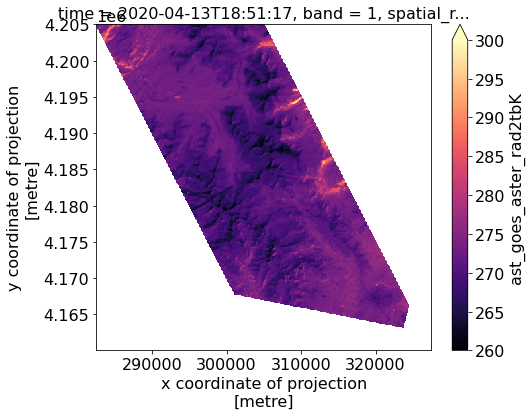

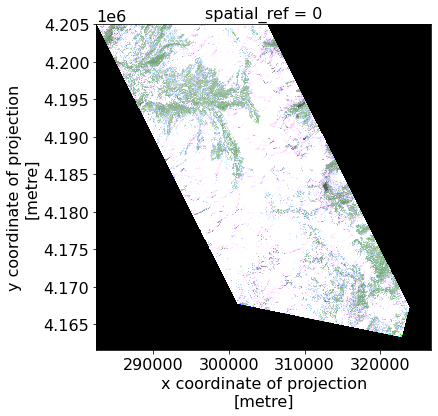

In [7]:
i = 24
plt.figure(figsize=(7.5,6))
ds.isel(time=i).ast_goes_aster_rad2tbK.plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).plot.imshow(rgb="band", vmin=0,vmax=255)

TCC

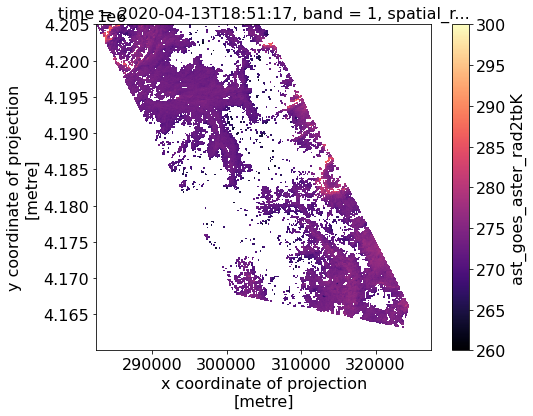

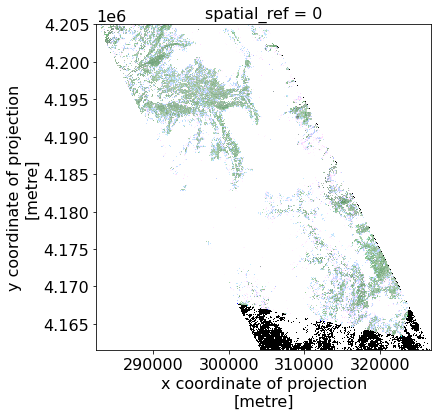

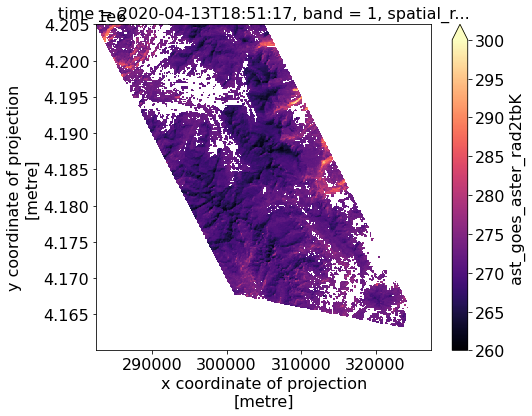

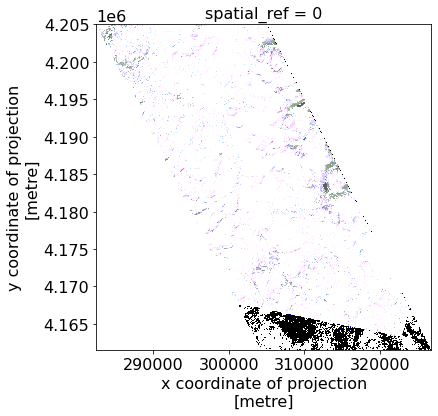

In [8]:
### TCC
k_tcc = 0
# plot where tcc > threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.tcc > k_tcc).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.tcc > k_tcc).plot.imshow(rgb="band", vmin=0,vmax=255)
# plot where tcc < threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.tcc <= k_tcc).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.tcc <= k_tcc).plot.imshow(rgb="band", vmin=0,vmax=255)


Satellite hillshade

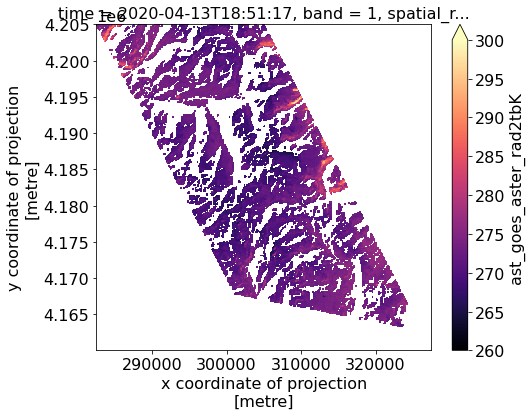

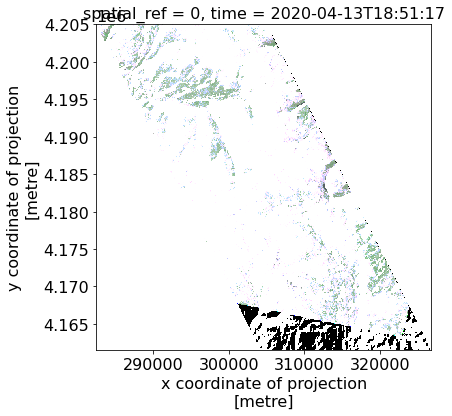

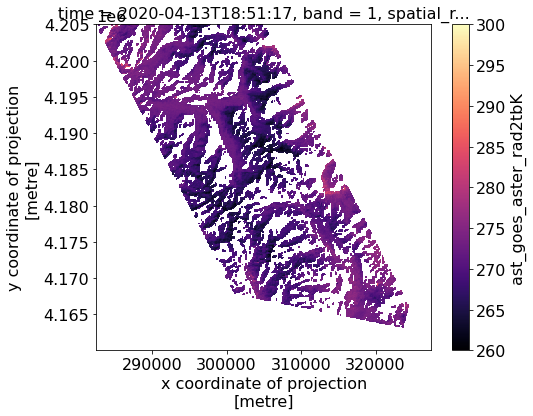

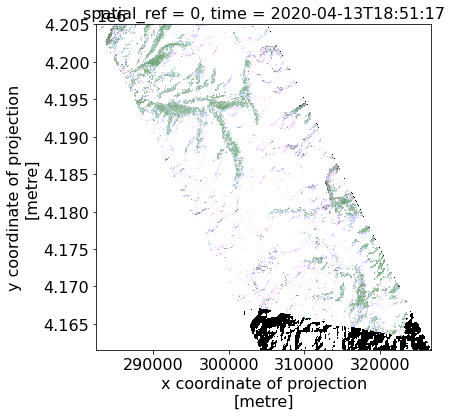

In [9]:
### SAT HILLSHADE
xx = ds.sat_hillshade.isel(time=i).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
k_sat_hillshade = np.quantile(xx, 0.50) # median
# plot where sat_hillshade > threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)
# plot where sat_hillshade < threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) <= k_sat_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.sat_hillshade.isel(time=i) <= k_sat_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)


Solar hillshade

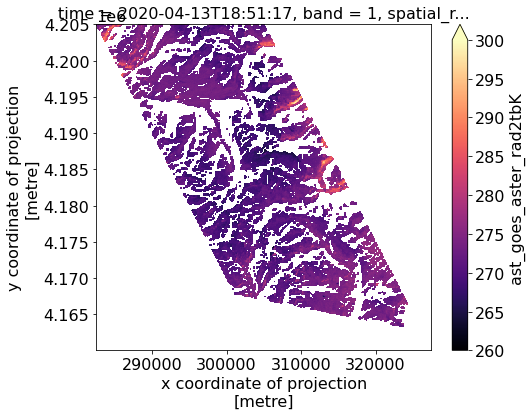

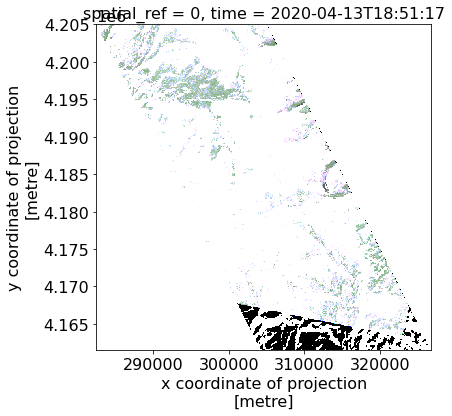

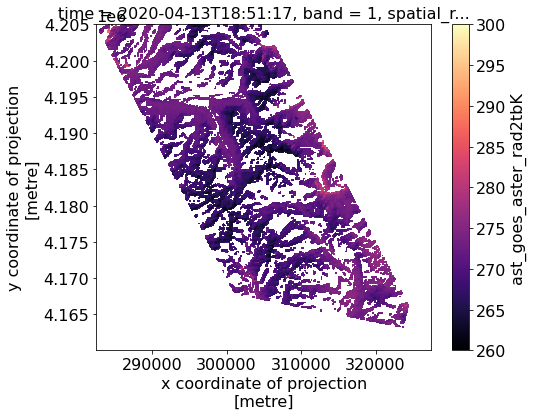

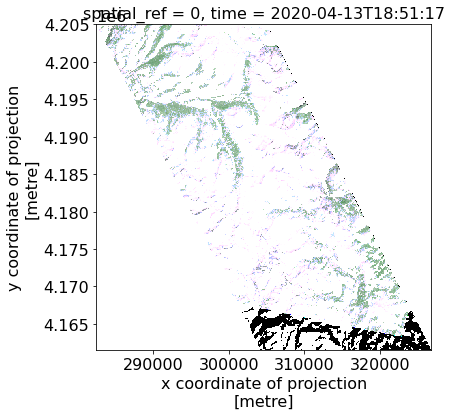

In [10]:
### SOLAR HILLSHADE
xx = ds.solar_hillshade.isel(time=i).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
k_solar_hillshade = np.quantile(xx, 0.50) # median
# plot where solar_hillshade > threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)
# plot where solar_hillshade < threshold
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
plt.figure(figsize=(6,6))
ds_vis.rio.clip(geometry).where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).plot.imshow(rgb="band", vmin=0,vmax=255)


What fraction of the area is satellite-facing and sun-facing?

46510 9039
fraction of satellite-facing area that is also sun-facing 84.0


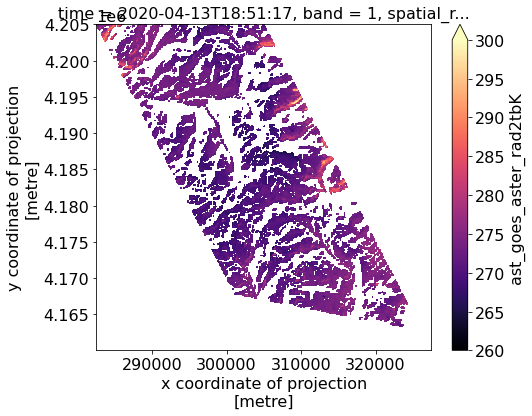

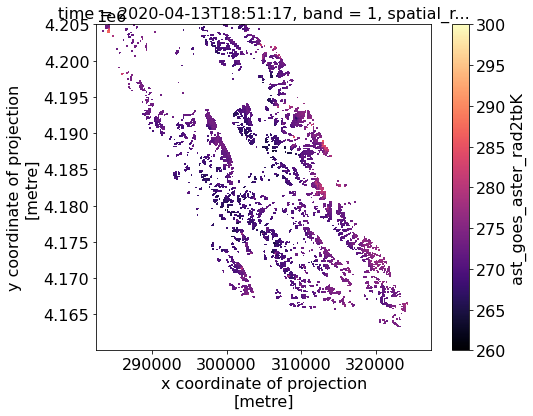

In [11]:
#####
##### What fraction of the area is satellite-facing and sun-facing?
# plot where solar_hillshade > threshold, and sat_hillshade > threshold
# satellite-facing that is also sun-facing
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
gt_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) > k_solar_hillshade).isel(time=i).values.ravel()
# satellite-facing that is not-sun-facing
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
lt_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > k_sat_hillshade).where(ds.solar_hillshade.isel(time=i) <= k_solar_hillshade).isel(time=i).values.ravel()

gt_k = gt_k[~np.isnan(gt_k)]
lt_k = lt_k[~np.isnan(lt_k)]

print(len(gt_k),len(lt_k))
print('fraction of satellite-facing area that is also sun-facing', 100*np.round(len(gt_k) / (len(gt_k)+len(lt_k)),2))


What is the fraction of terrain that is occluded from the sun (in shadow) or from the satellite (not visible) or both?

3461 0
fraction of occluded area (satellite pov) 3.0
fraction of occluded (shaded) area (sun pov) 0.0


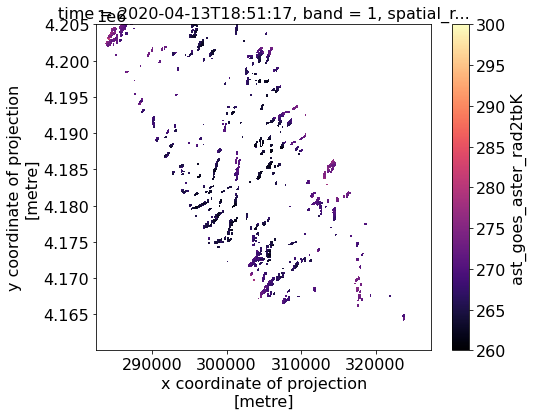

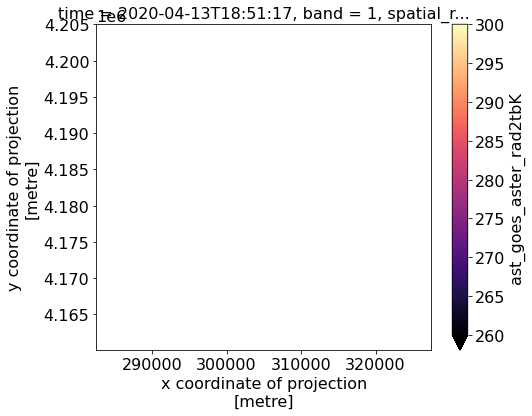

In [12]:
####
#### What is the fraction of terrain that is occluded from the sun (in shadow) or from the satellite (not visible) or both?
# terrain occluded from satellite's view
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) < 0).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
sat_lt0_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) < 0).isel(time=i).values.ravel()
# shaded terrain (occluded from sun's view)
plt.figure(figsize=(7.5,6))
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade.isel(time=i) < 0).isel(time=i).plot(cmap='magma',vmin=260,vmax=300)
sun_lt0_k = ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade.isel(time=i) < 0).isel(time=i).values.ravel()

sat_lt0_k = sat_lt0_k[~np.isnan(sat_lt0_k)]
sun_lt0_k = sun_lt0_k[~np.isnan(sun_lt0_k)]

total_pixels = ds.ast_goes_aster_rad2tbK.isel(time=i).values.ravel()
total_pixels = len(total_pixels[~np.isnan(total_pixels)])

print(len(sat_lt0_k),len(sun_lt0_k))
print('fraction of occluded area (satellite pov)', 100* ( np.round((len(sat_lt0_k) / total_pixels), 2) ))
print('fraction of occluded (shaded) area (sun pov)', 100* (np.round((len(sun_lt0_k) / total_pixels), 2) ))


---
### modscag

Make two zones based on modscag (threshold at 50%). Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

In [13]:
#plt.figure()
#ds.modscag.isel(time=26).plot(cmap='Blues')
#plt.figure()
#ds.binary_snow.isel(time=26).plot(cmap='Blues')
#plt.figure()
#ds.binary_snow_gt50.isel(time=26).plot(cmap='Blues')
#plt.figure()
#ds.fsca.isel(time=26).plot(cmap='Blues')

In [14]:
xx = ds.modscag.values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
xx = xx[xx!=0] # remove zeros
np.quantile(xx, 0.50) # median

59.0

In [15]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        ## find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 50 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.modscag > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.modscag <= k).isel(time=i).values.ravel())

number of pixels:  83858 25982
means:  270.5 273.9
mean diff: -3.4
medians:  270.6 273.4


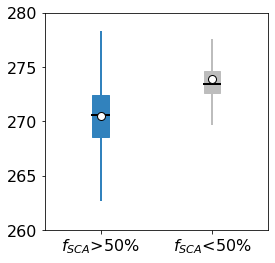

In [16]:
n=24

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['$f_{SCA}$>50%', '$f_{SCA}$<50%']);


color1='#3182bd'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

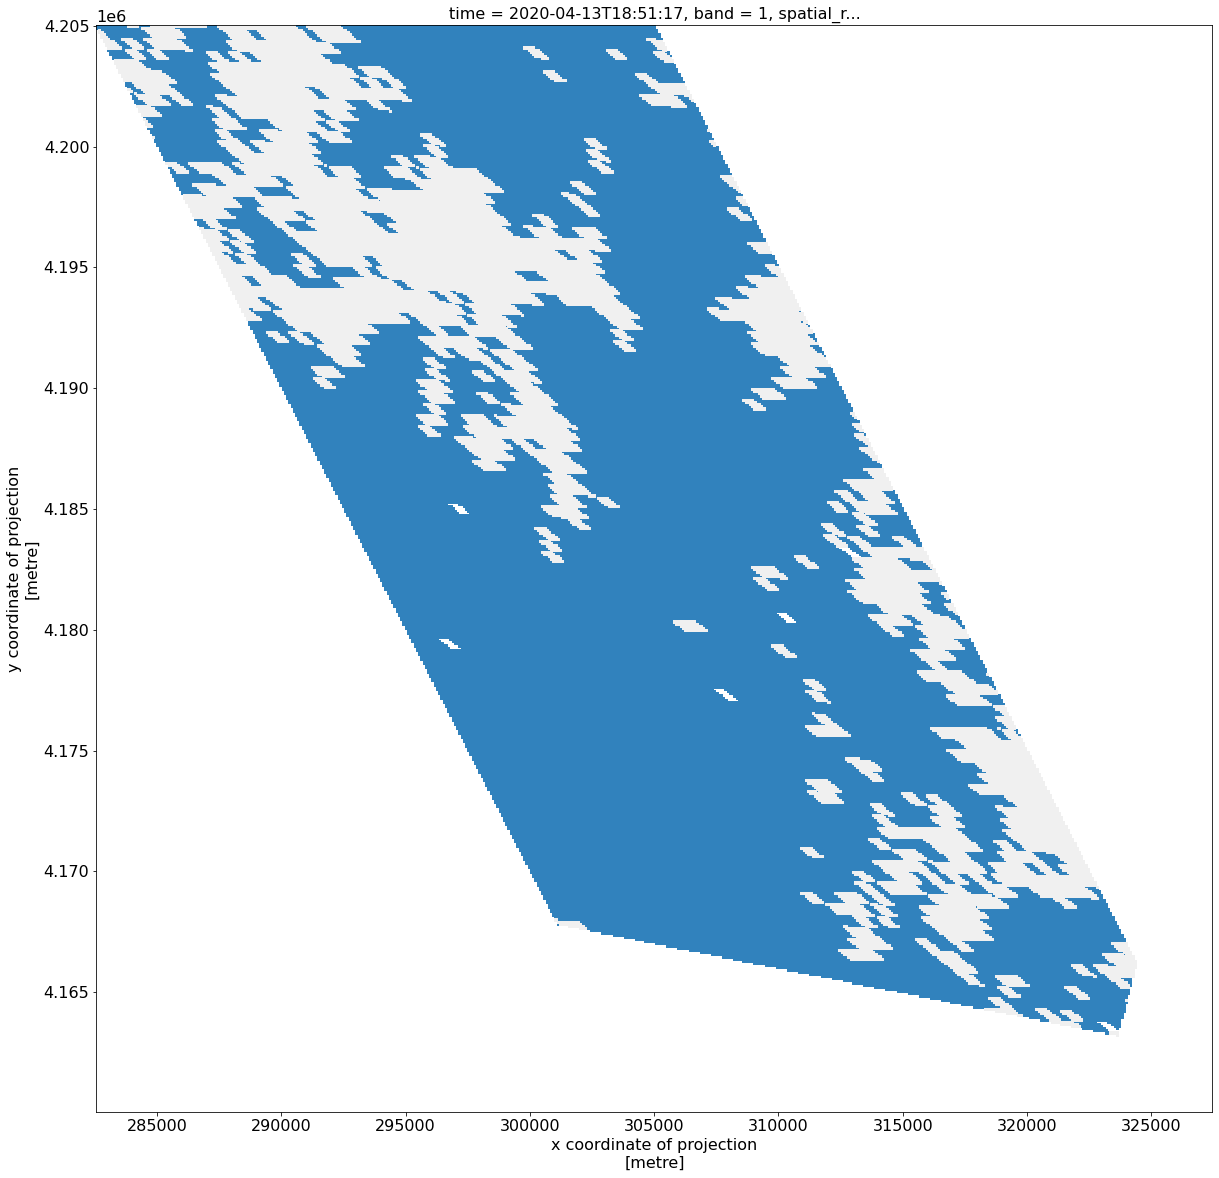

In [17]:
k = 50

# blue
blue_cmap = ListedColormap(['#3182bd'])

# grey
grey_cmap = ListedColormap(['#f0f0f0'])

plt.figure(figsize=(20,20))
# green
ds.ast_goes_aster_rad2tbK.where(ds.modscag > k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=blue_cmap)
# grey
ds.ast_goes_aster_rad2tbK.where(ds.modscag <= k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=grey_cmap)


---
### Tree Canopy Cover

Make two zones based on TCC, using the median as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

What is the median TCC? (ignoring zeros)

In [18]:
xx = ds.tcc.values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
xx = xx[xx!=0] # remove zeros
np.quantile(xx, 0.50) # median

38.0

ASTER surface brightness temperatures:

In [19]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        ## find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 0 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.tcc > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.tcc <= k).isel(time=i).values.ravel())

number of pixels:  35270 74725
means:  273.3 270.3
mean diff: 3.0
medians:  273.3 270.3


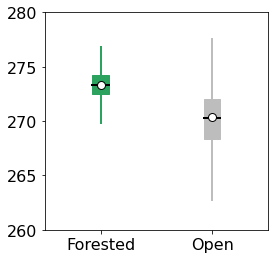

In [20]:
n=24

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Forested', 'Open']);


color1='#2ca25f'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [21]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(250,300);

ABI-ASTER surface brightness temperature differences:

In [22]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        ## find the 50% quantile (median) (or some other quantile) and use that as the threshold
        #xx = ds.tcc.values.ravel()
        #xx = xx[~np.isnan(xx)] # remove nans
        #xx = xx[xx!=0] # remove zeros
        k = 0 #np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_mean_diff_tb.where(ds.tcc > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_mean_diff_tb.where(ds.tcc <= k).isel(time=i).values.ravel())

number of pixels:  35270 74725
means:  2.6 2.5
mean diff: 0.1
medians:  2.7 2.5


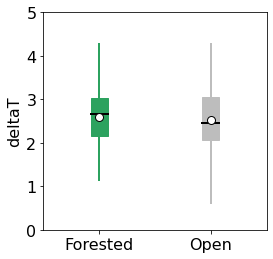

In [23]:
n=24

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Forested', 'Open']);


color1='#2ca25f'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(0,5);
plt.ylabel('deltaT')

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

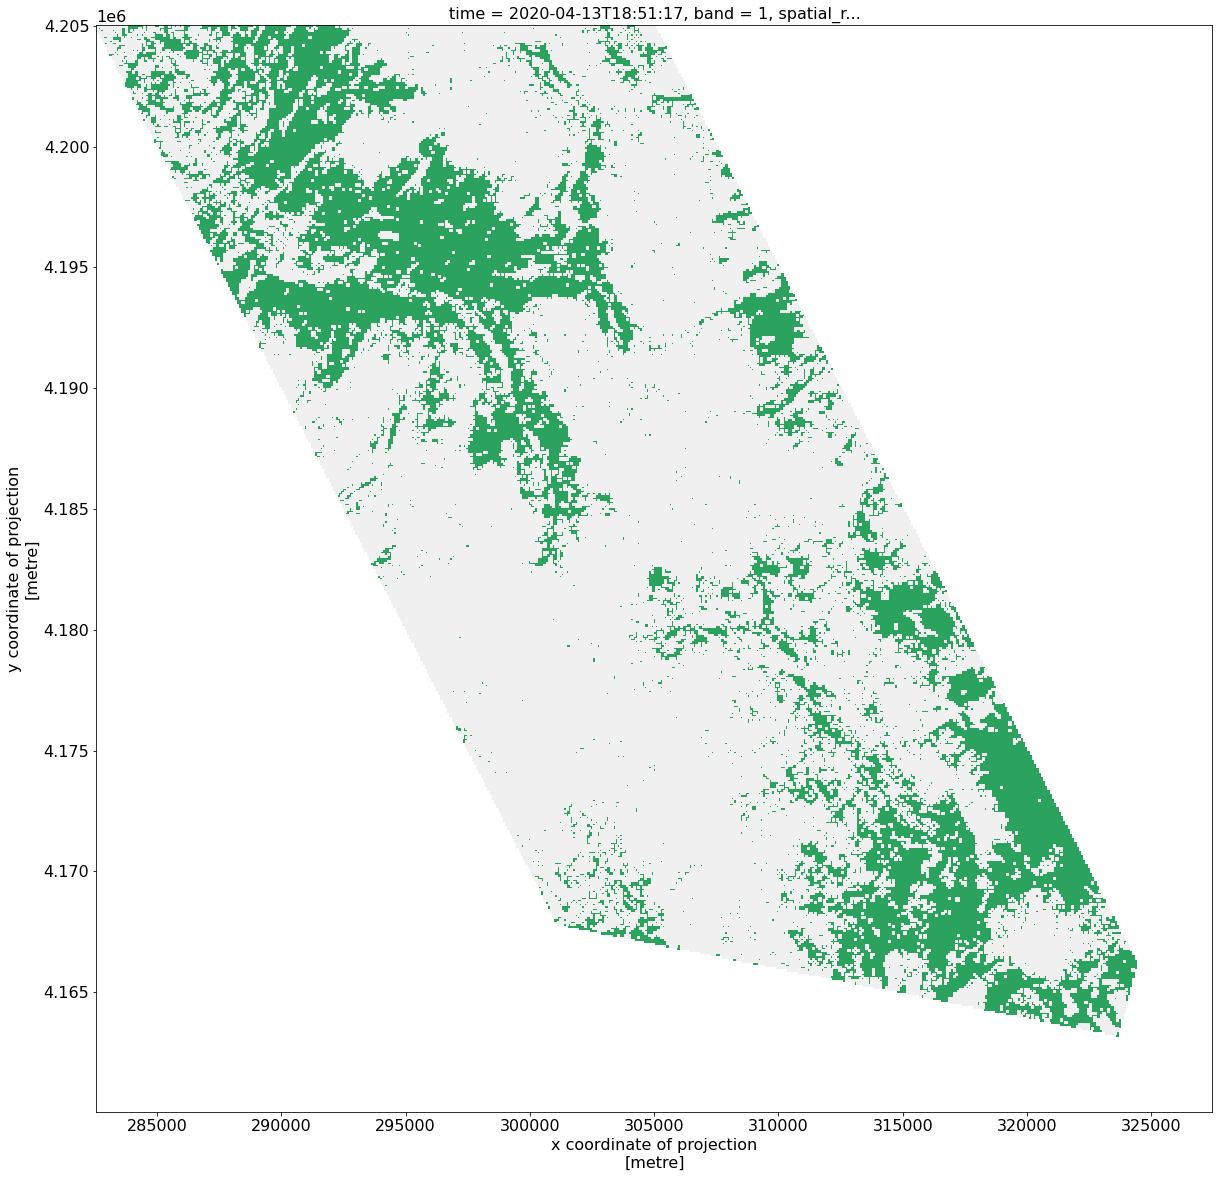

In [24]:
# green
green_cmap = ListedColormap(['#2ca25f'])

# grey
grey_cmap = ListedColormap(['#f0f0f0'])

plt.figure(figsize=(20,20))
# green
ds.ast_goes_aster_rad2tbK.where(ds.tcc > k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=green_cmap)
# grey
ds.ast_goes_aster_rad2tbK.where(ds.tcc <= k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=grey_cmap)


In [25]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(-10,10);

While the trees (ASTER temperatures where tcc>0) do appear warmer in many of the images (both day and night it seems), the ABI-ASTER biases between trees and no trees seem both about the same in each image (note, these biases are computed from the upscaled ABI resolution ASTER, so we don't really have the spatial resolution to see much of anything anyways, this second set of plots is probably not very useful)

---
### Terrain

Make two zones based on the terrain hillshade from the satellite's point of view, where brighter terrain (1) means that the satellite's line of sight is normal to the land surface, grey (0) means that the angle is perpendicular, and black (-1) is facing the opposite direction.

Again, use the median hillshade value as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

What is the median hillshade (satellite) value?

In [26]:
xx = ds.sat_hillshade.isel(time=26).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
np.quantile(xx, 0.50) # median

IndexError: index 26 is out of bounds for axis 0 with size 25

ASTER surface brightness temperatures:

In [ ]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade <= k).isel(time=i).values.ravel())

In [ ]:
n=24

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Satellite\nFacing', 'Away\nFacing']);


color1='#2b8cbe'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [ ]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(250,300);

ABI-ASTER surface brightness temperature differences:

In [ ]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_mean_diff_tb.where(ds.sat_hillshade > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_mean_diff_tb.where(ds.sat_hillshade <= k).isel(time=i).values.ravel())

number of pixels:  35270 74725
means:  2.6 2.5
mean diff: 0.1
medians:  2.7 2.5


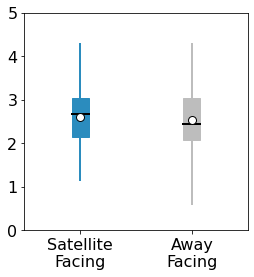

In [27]:
n=24

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Satellite\nFacing', 'Away\nFacing']);


color1='#2b8cbe'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(0,5);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [28]:
#for n, _ in enumerate(ds.time.values):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(-10,10);

---
### Sun + Terrain

Make two zones based on the terrain hillshade from the sun.

Again, use the median hillshade value as the threshold between the two groups. Then look at ASTER temperatures within each zone, and surface temperature biases (ABI-ASTER) within each zone.

What is the median hillshade (solar) value (daytime)?

In [30]:
xx = ds.solar_hillshade.isel(time=24).values.ravel()
xx = xx[~np.isnan(xx)] # remove nans
np.quantile(xx, 0.50) # median

0.8358289208945802

ASTER surface brightness temperatures:

In [31]:
gt_k = [] # greater than threshold, k
lt_k = [] # less than threshold, k
ks = [] # threshold values for each image
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.solar_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        ks.append(k)
        gt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > k).isel(time=i).values.ravel())
        lt_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= k).isel(time=i).values.ravel())

number of pixels:  54822 54954
means:  272.3 270.3
mean diff: 1.9
medians:  272.1 270.7


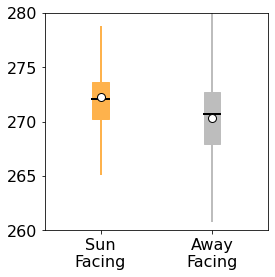

In [32]:
n=24

gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
lt_k_n = lt_k[n][~np.isnan(lt_k[n])]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([gt_k_n, 
                     lt_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Sun\nFacing', 'Away\nFacing']);


color1='#feb24c'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(gt_k_n),len(lt_k_n))
print('means: ',np.round(np.mean(gt_k_n),1),np.round(np.mean(lt_k_n),1))
print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [33]:
#for n in range(0,len(times)):
#    gt_k_n = gt_k[n][~np.isnan(gt_k[n])]
#    lt_k_n = lt_k[n][~np.isnan(lt_k[n])]
#
#    #print(len(gt_k_n),len(lt_k_n))
#    plt.figure()
#    plt.boxplot([gt_k_n, 
#                lt_k_n], showfliers=False, showmeans=True);
#    plt.title(times[n])
#    #plt.ylim(-10,10);

---

### Combination of Solar- and Satellite-Facing Terrain

In [34]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


# magenta
color1='#dd1c77'
magenta_cmap = ListedColormap([color1])

# yellow
color2='#feb24c'
yellow_cmap = ListedColormap([color2])

# grey
color3 = '#bdbdbd'
grey_cmap = ListedColormap(['#f0f0f0'])

# blue
color4 = '#2b8cbe'
blue_cmap = ListedColormap([color4])

# black
black_cmap = ListedColormap(['#000000'])




In [35]:
gtsolar_gtsat_k = []
gtsolar_ltsat_k = [] 
ltsolar_ltsat_k = []
ltsolar_gtsat_k = []
occluded_sat_k = []
times = [] # time of each image

# for each image in the dataset
for i in range(0,len(ds.time)):
    # look at all, or only look at daytime images (daytime hours UTC will be around 18, nighttime around 6)
    if ds.time.isel(time=i).dt.hour > 0:
        # find the 50% quantile (median) (or some other quantile) and use that as the threshold
        xx = ds.solar_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        solar_k = np.quantile(xx, 0.50) # median
        xx = ds.sat_hillshade.isel(time=i).values.ravel()
        xx = xx[~np.isnan(xx)] # remove nans
        sat_k = np.quantile(xx, 0.50) # median
        times.append(ds.time.isel(time=i).values)
        gtsolar_gtsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).values.ravel())
        gtsolar_ltsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where((ds.sat_hillshade <= sat_k) & (ds.sat_hillshade > 0)).isel(time=i).values.ravel())
        ltsolar_ltsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where((ds.sat_hillshade <= sat_k) & (ds.sat_hillshade > 0)).isel(time=i).values.ravel())
        ltsolar_gtsat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).values.ravel())
        occluded_sat_k.append(ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade <= 0).isel(time=i).values.ravel())


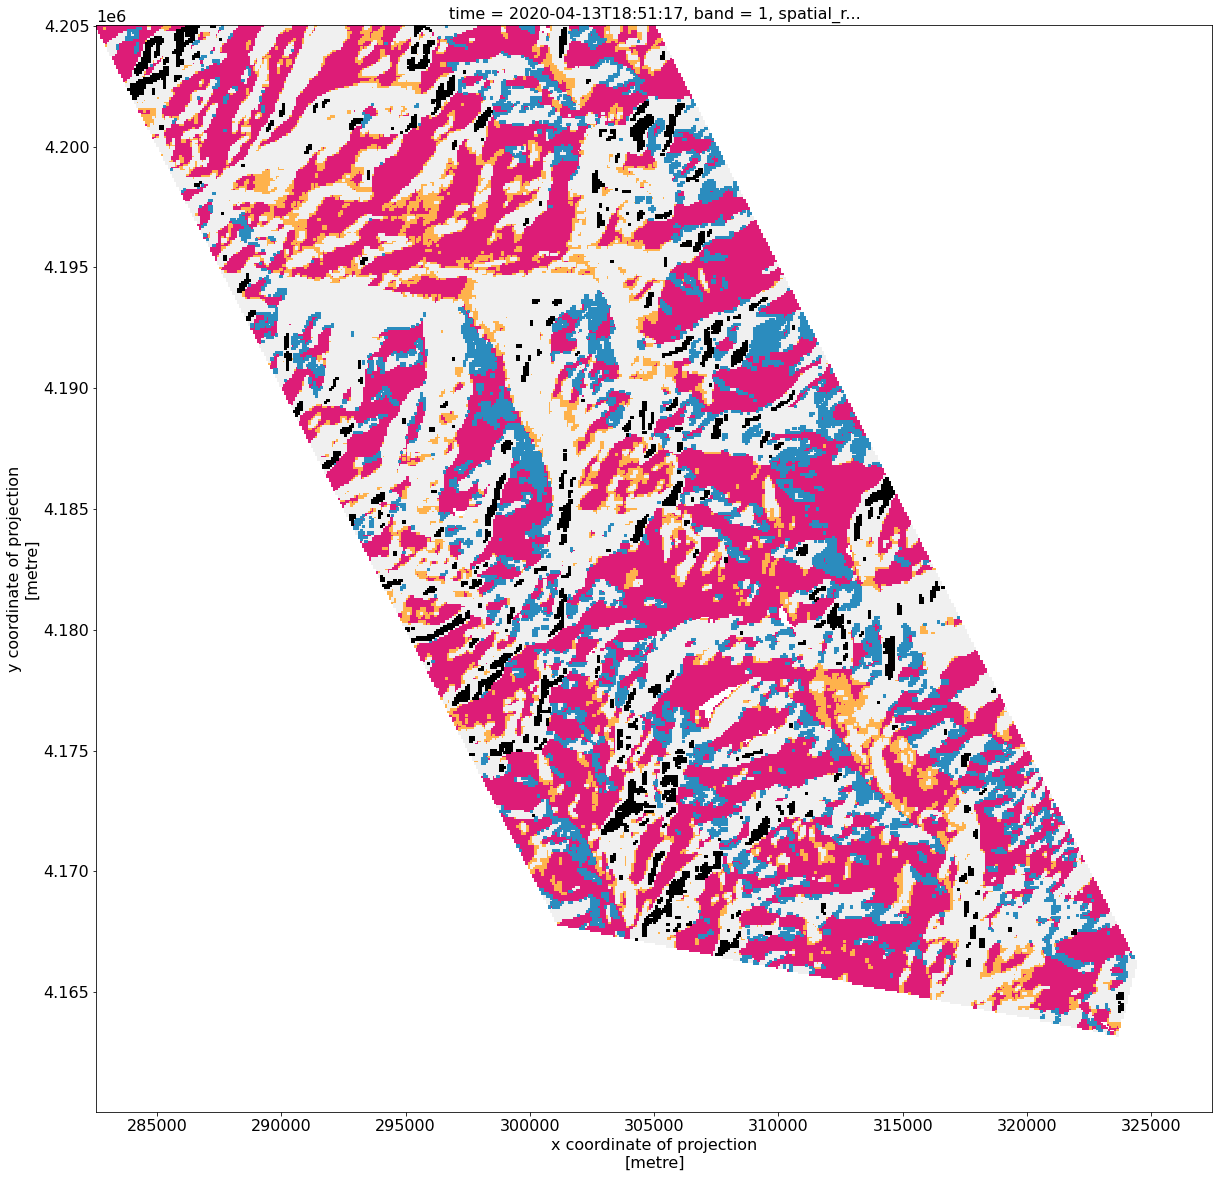

In [36]:
plt.figure(figsize=(20,20))
# magenta
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=magenta_cmap)
# yellow
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=yellow_cmap)
# blue/purple
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=grey_cmap)
# cyan
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=blue_cmap)
# black, pixels occluded from satellite's view
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) <= 0).isel(time=i).plot(cmap='Greys_r',vmin=300,vmax=301, add_colorbar=False)

In [37]:
# Removing the occluded terrain doesn't seem to make much of a difference
# hinting that there are more factors than just this
print('image-wide GOES mean Tb: ', ds.ast_goes_goes_tb.isel(time=i).mean().values)
print('image-wide ASTER mean Tb: ', ds.ast_goes_aster_rad2tbK.isel(time=i).mean().values)
print('image-wide ASTER-upscaled mean Tb: ', ds.ast_goes_mean_rad2tbK.isel(time=i).mean().values)
print('image-wide ASTER mean Tb, with occluded terrain removed: ', ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > 0).isel(time=i).mean().values)
print('image-wide ASTER-upscaled mean Tb, with occluded terrain removed: ', ds.ast_goes_mean_rad2tbK.where(ds.sat_hillshade.isel(time=i) > 0).isel(time=i).mean().values)
#.where(ds.sat_hillshade.isel(time=i) > 0).isel(time=i).mean()

image-wide GOES mean Tb:  273.96237
image-wide ASTER mean Tb:  271.2919736009647
image-wide ASTER-upscaled mean Tb:  271.41260289569834
image-wide ASTER mean Tb, with occluded terrain removed:  271.4170057012483
image-wide ASTER-upscaled mean Tb, with occluded terrain removed:  271.43485730943104


number of pixels:  106315 3461
means:  271.4 267.5
mean diff: 3.9
medians:  271.6 267.1


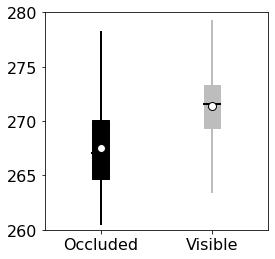

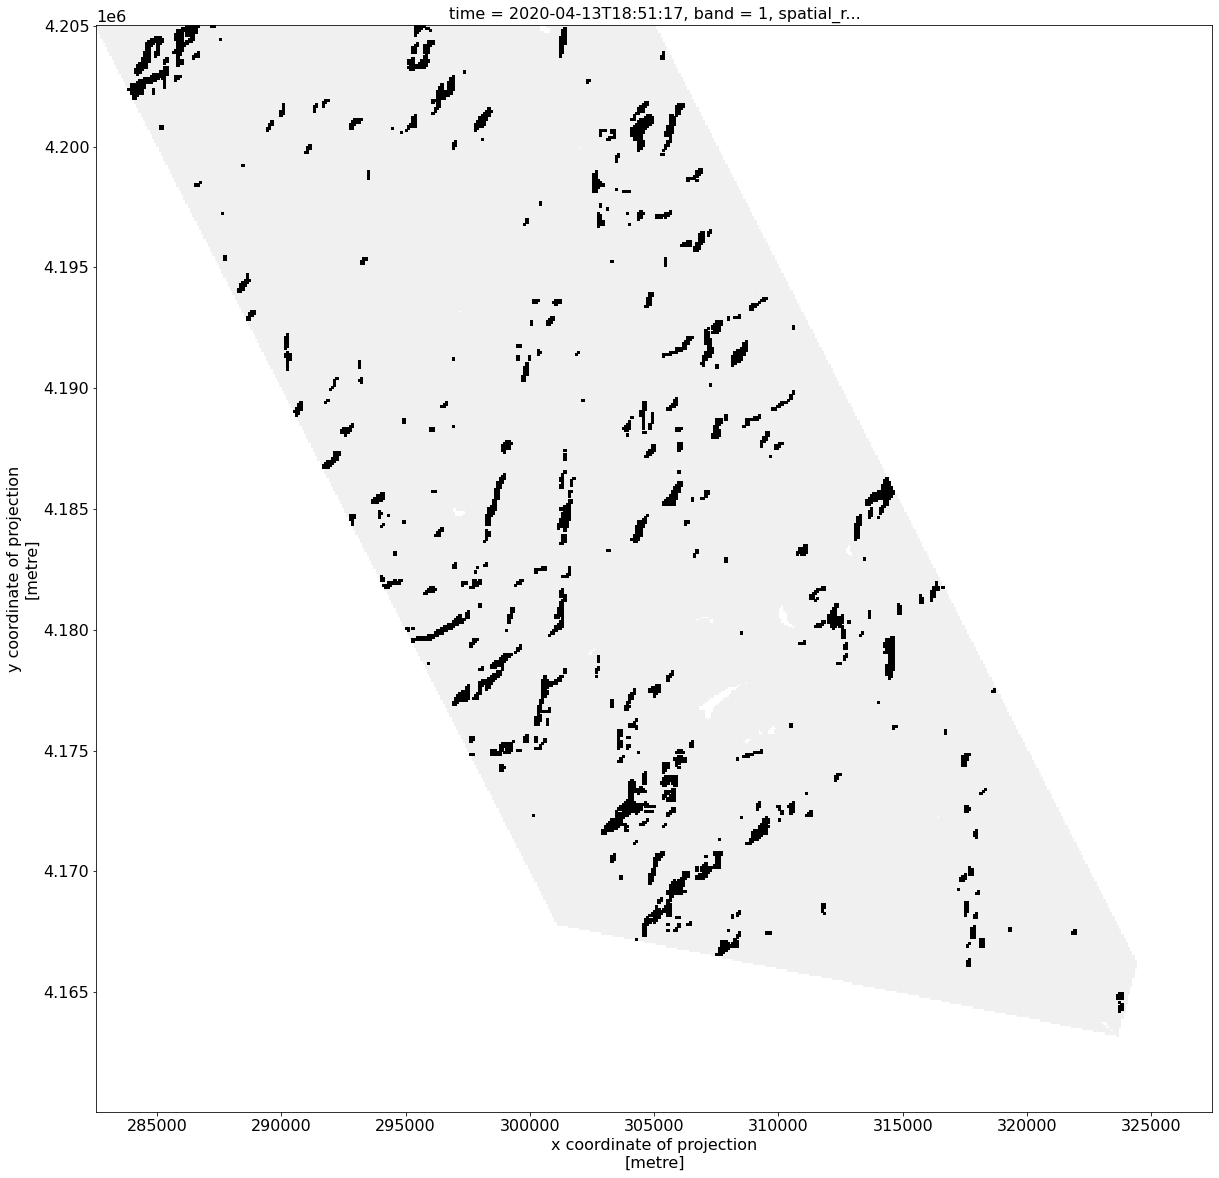

In [38]:
sat_lt0_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) <= 0).isel(time=i).values.ravel()
sat_gt0_k = ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > 0).isel(time=i).values.ravel()

sat_lt0_k = sat_lt0_k[~np.isnan(sat_lt0_k)]
sat_gt0_k = sat_gt0_k[~np.isnan(sat_gt0_k)]


plt.figure(figsize=(4,4))

bplot = plt.boxplot([sat_lt0_k, 
                     sat_gt0_k],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['Occluded', 'Visible']);


color1='k'
color2='#bdbdbd'
# fill with colors
colors = [color1, color2]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['k', 'k']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('w')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
plt.ylim(260,280);

print('number of pixels: ',len(sat_gt0_k),len(sat_lt0_k))
print('means: ',np.round(np.mean(sat_gt0_k),1),np.round(np.mean(sat_lt0_k),1))
print(f'mean diff: {np.round(np.mean(sat_gt0_k)-np.mean(sat_lt0_k),1)}')
print('medians: ',np.round(np.median(sat_gt0_k),1),np.round(np.median(sat_lt0_k),1))



plt.figure(figsize=(20,20))
# grey
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) > 0).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=grey_cmap)
# black
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) <= 0).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='Greys_r')

In [39]:
#
#
#
#plt.figure(figsize=(20,20))
## magenta
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring')
## yellow
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring_r')
## blue/purple
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='winter')
## cyan
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='cool')

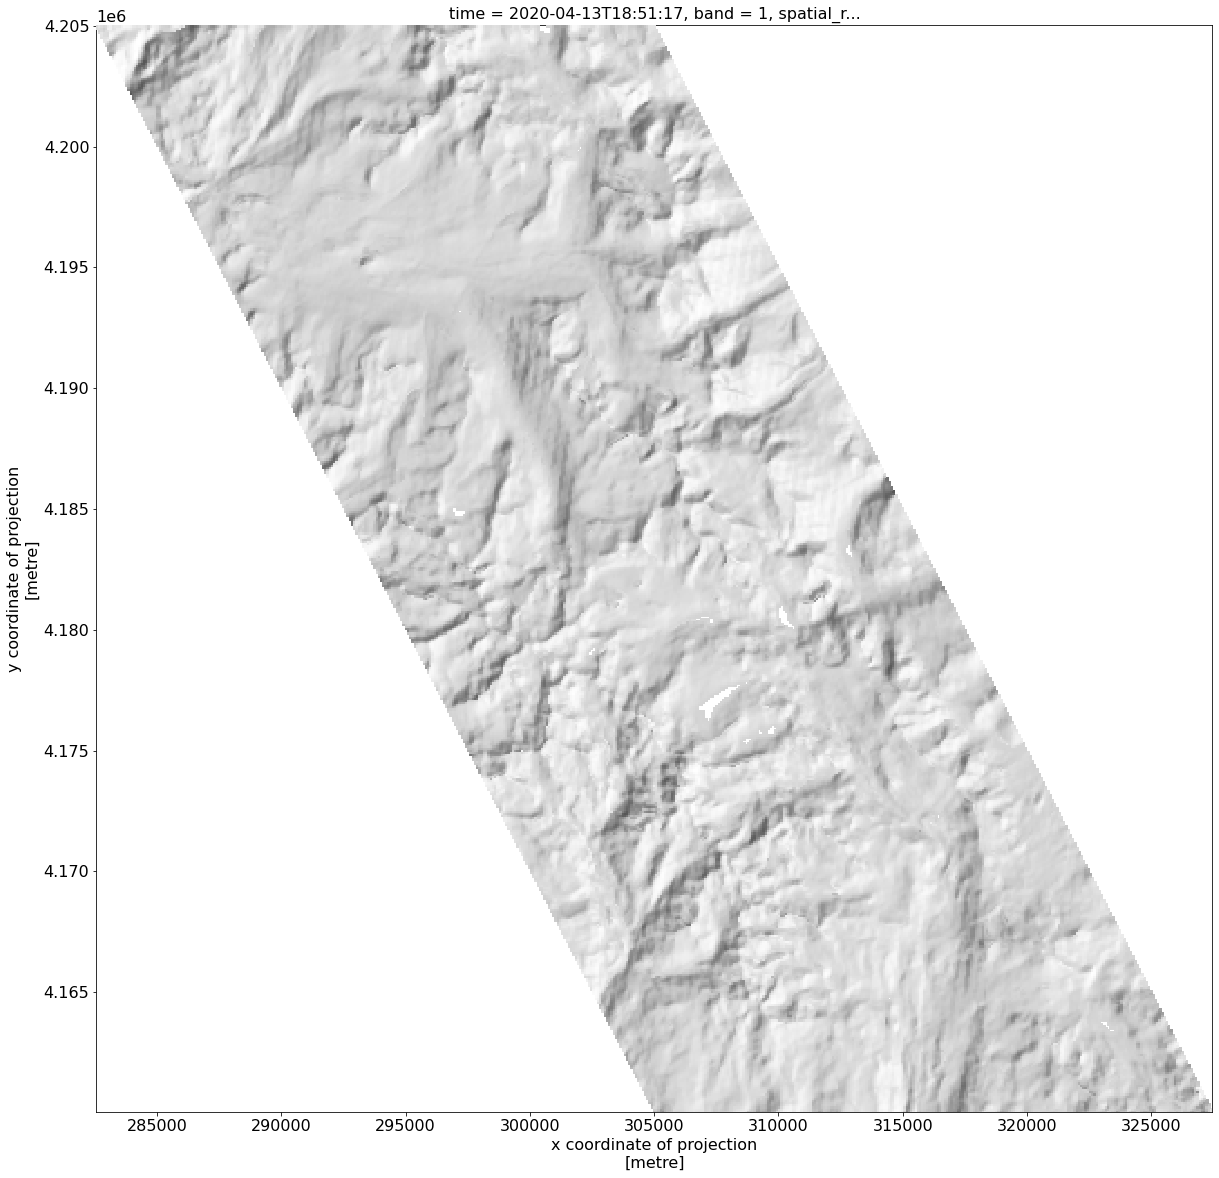

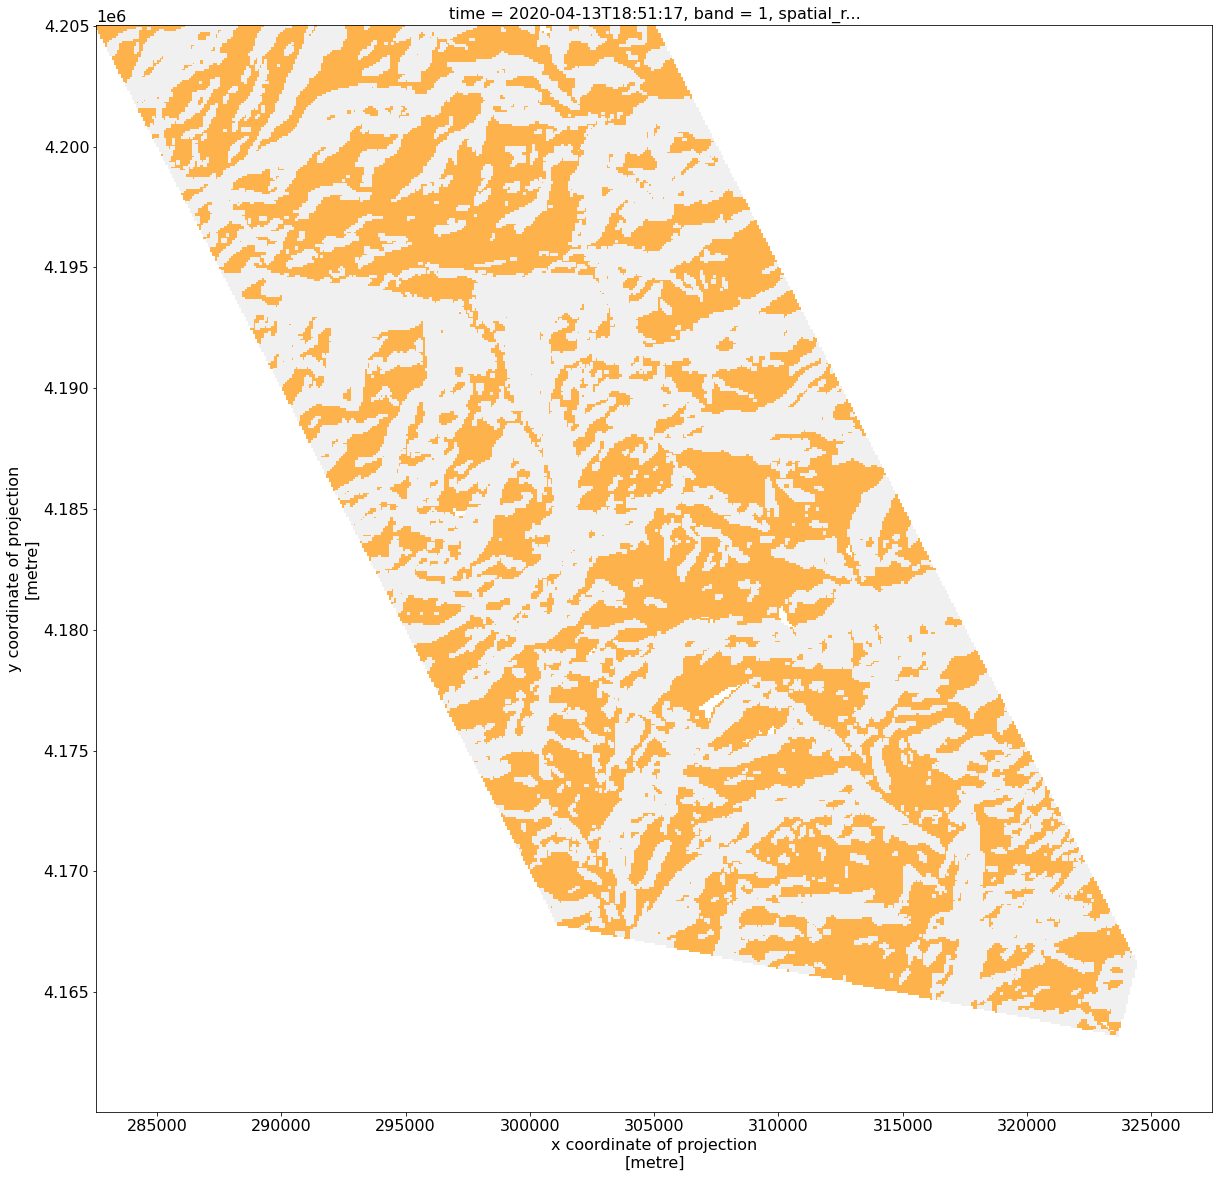

In [40]:
plt.figure(figsize=(20,20))
ds.sat_hillshade.isel(time=i).plot(cmap='Greys_r', zorder=99, add_colorbar=False)

plt.figure(figsize=(20,20))
# yellow
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=yellow_cmap)
# blue/purple
ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=grey_cmap)

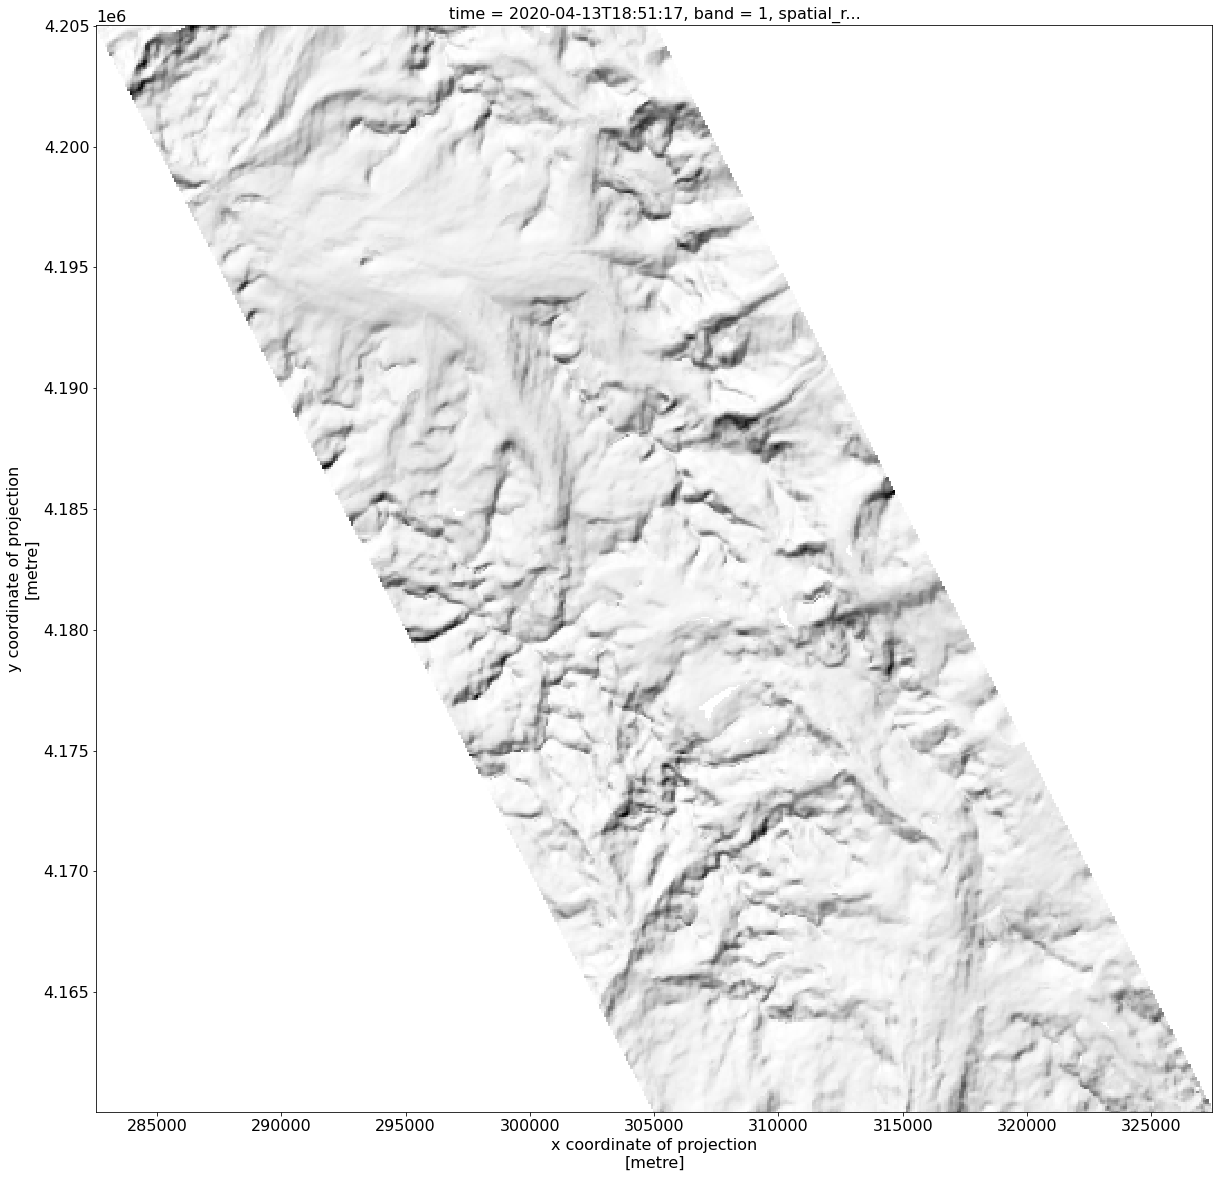

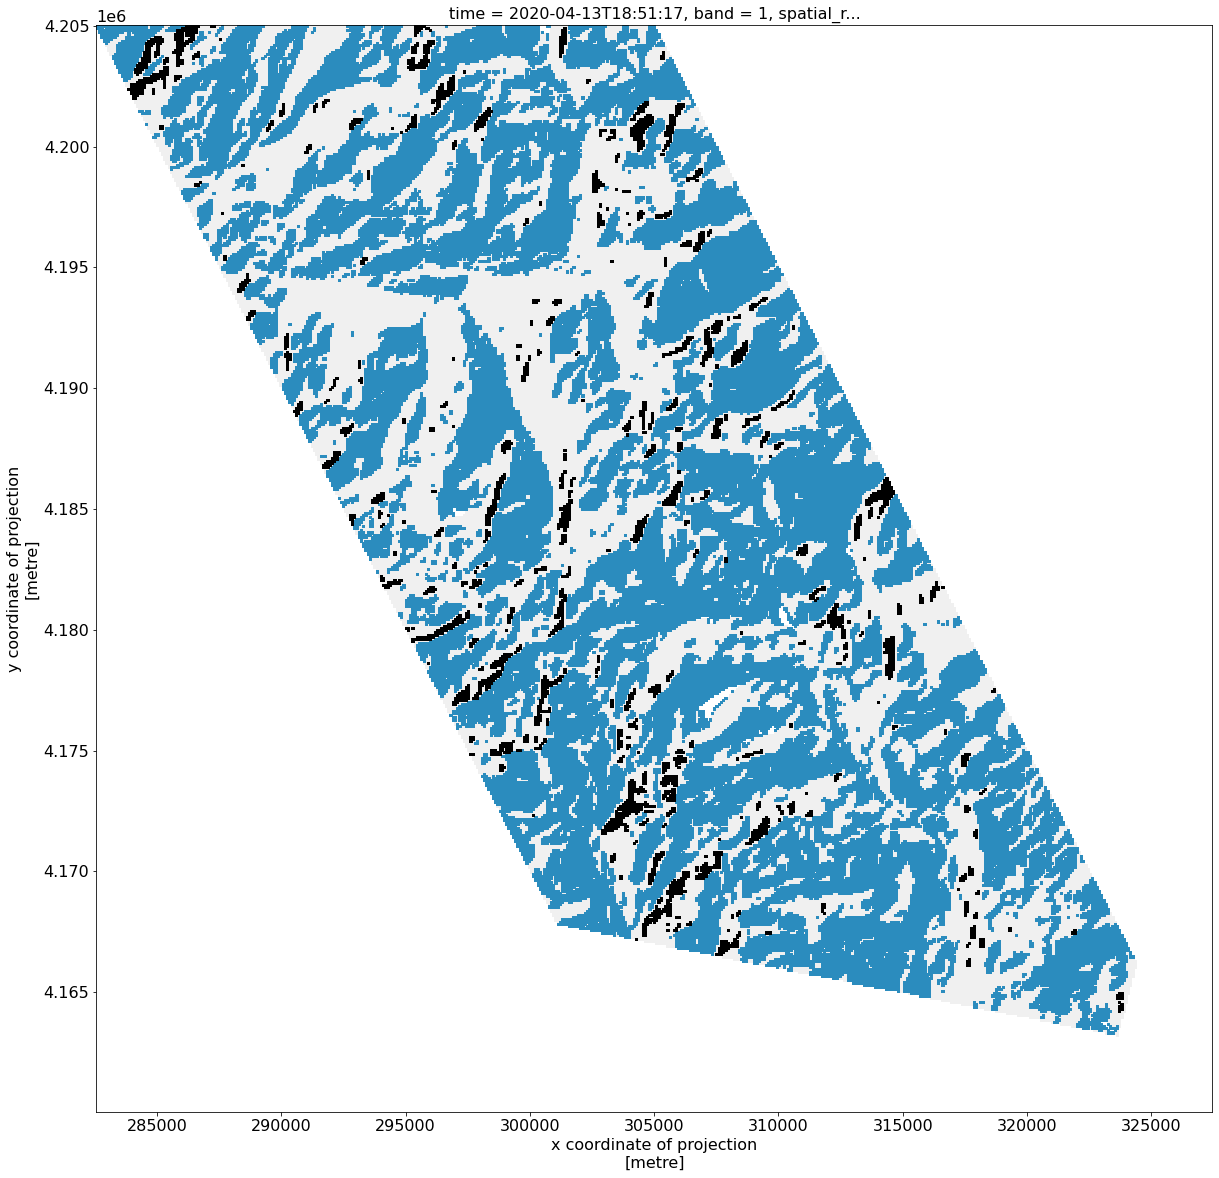

In [41]:
plt.figure(figsize=(20,20))
ds.solar_hillshade.isel(time=i).plot(cmap='Greys_r', add_colorbar=False)

plt.figure(figsize=(20,20))

# blue/purple
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=grey_cmap)
# cyan
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap=blue_cmap)

# black
ds.ast_goes_aster_rad2tbK.where(ds.sat_hillshade.isel(time=i) <= 0).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='Greys_r')

In [42]:
#plt.figure(figsize=(20,20))
#
## magenta
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring')
## yellow
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade > solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='spring_r')
## blue/purple
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade <= sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='winter')
## cyan
#ds.ast_goes_aster_rad2tbK.where(ds.solar_hillshade <= solar_k).where(ds.sat_hillshade > sat_k).isel(time=i).plot(add_colorbar=False,vmin=500,vmax=501,cmap='cool')
#
#
#
#ds_vis.rio.clip(geometry).plot.imshow(rgb="band", vmin=0,vmax=255, alpha=0.75, zorder=99)

number of pixels:  46510 8312 42454 9039 3461
fraction of area:  0.42368095029879027 0.07571782538988486 0.38673298353009766 0.08234040227372103 0.03152783850750619
means:  272.4 271.5 270.3 271.6 267.5
ASTER image-wide mean:  271.3
MODIS image-wide mean:  271.4
GOES-16 ABI image-wide mean:  274.0


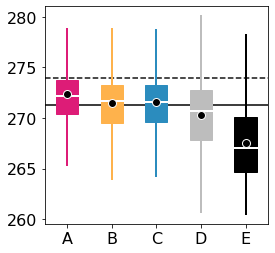

In [43]:

# magenta
color1='#dd1c77'

# yellow
color2='#feb24c'

# blue
color3 = '#2b8cbe'

# grey
color4 = '#bdbdbd'

# black
color5 = '#000000'



n=24

gtsolar_gtsat_k_n = gtsolar_gtsat_k[n][~np.isnan(gtsolar_gtsat_k[n])]
gtsolar_ltsat_k_n = gtsolar_ltsat_k[n][~np.isnan(gtsolar_ltsat_k[n])]
ltsolar_ltsat_k_n = ltsolar_ltsat_k[n][~np.isnan(ltsolar_ltsat_k[n])]
ltsolar_gtsat_k_n = ltsolar_gtsat_k[n][~np.isnan(ltsolar_gtsat_k[n])]
occluded_sat_k_n = occluded_sat_k[n][~np.isnan(occluded_sat_k[n])]

plt.figure(figsize=(4,4))

bplot = plt.boxplot([gtsolar_gtsat_k_n,
                     gtsolar_ltsat_k_n,
                     ltsolar_gtsat_k_n,
                     ltsolar_ltsat_k_n,
                     occluded_sat_k_n],
                     showfliers=False, showmeans=True, patch_artist=True,
                     labels=['A', 'B', 'C', 'D', 'E']);


# fill with colors
colors = [color1, color2, color3, color4, color5]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_edgecolor(color)
    patch.set_facecolor(color)
colors = ['w', 'w', 'w', 'w', 'w']
for patch, color in zip(bplot['medians'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['means'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markerfacecolor('k')
    patch.set_marker('o')
    patch.set_markersize(8)
for patch, color in zip(bplot['fliers'], colors):
    patch.set_markeredgecolor(color)
    patch.set_markersize(1)
    patch.set_marker('.')
colors = [color1, color1, color2, color2, color3, color3, color4, color4, color5, color5]
for patch, color in zip(bplot['whiskers'], colors):
    patch.set_color(color)
    patch.set_linewidth(2)
for patch, color in zip(bplot['caps'], colors):
    patch.set_color(color)
    patch.set_linewidth(0)
    
    
    
#plt.title(times[n])
#plt.ylim(260,280);

# horizontal line for mean aster Tb
plt.axhline(ds.ast_goes_aster_rad2tbK.isel(time=n).mean(), linestyle='-', color='k', zorder=-99)

# horizontal line for mean ABI Tb
plt.axhline(ds.ast_goes_goes_tb.isel(time=n).mean(), linestyle='--', color='#111111', zorder=-99)

print('number of pixels: ',len(gtsolar_gtsat_k_n),len(gtsolar_ltsat_k_n),len(ltsolar_ltsat_k_n),len(ltsolar_gtsat_k_n),len(occluded_sat_k_n))
total_px = len(gtsolar_gtsat_k_n)+len(gtsolar_ltsat_k_n)+len(ltsolar_ltsat_k_n)+len(ltsolar_gtsat_k_n)+len(occluded_sat_k_n)
print('fraction of area: ',len(gtsolar_gtsat_k_n)/total_px,len(gtsolar_ltsat_k_n)/total_px,len(ltsolar_ltsat_k_n)/total_px,len(ltsolar_gtsat_k_n)/total_px,len(occluded_sat_k_n)/total_px)

print('means: ',np.round(np.mean(gtsolar_gtsat_k_n),1),
                np.round(np.mean(gtsolar_ltsat_k_n),1),
                np.round(np.mean(ltsolar_ltsat_k_n),1),
                np.round(np.mean(ltsolar_gtsat_k_n),1),
                np.round(np.mean(occluded_sat_k_n),1))

print('ASTER image-wide mean: ', np.round(ds.ast_goes_aster_rad2tbK.isel(time=n).mean().values,1))
print('MODIS image-wide mean: ', np.round(ds.ast_mod_modis_tb.isel(time=n).mean().values,1))
print('GOES-16 ABI image-wide mean: ', np.round(ds.ast_goes_goes_tb.isel(time=n).mean().values,1))
#print(f'mean diff: {np.round(np.mean(gt_k_n)-np.mean(lt_k_n),1)}')
#print('medians: ',np.round(np.median(gt_k_n),1),np.round(np.median(lt_k_n),1))

In [44]:
ds

<xarray.Dataset>
Dimensions:                          (time: 25, x: 499, y: 500)
Coordinates:
  * y                                (y) float64 4.16e+06 4.16e+06 ... 4.205e+06
  * x                                (x) float64 2.826e+05 ... 3.274e+05
  * time                             (time) datetime64[ns] 2017-04-21T18:51:07 ... 2020-04-13T18:51:17
    band                             int64 1
    spatial_ref                      int64 0
Data variables:
    ast_goes_aster_rad               (time, y, x) float64 nan nan ... nan nan
    ast_goes_goes_rad                (time, y, x) float32 nan nan ... nan nan
    ast_goes_goes_tb                 (time, y, x) float32 nan nan ... nan nan
    ast_goes_goes_zones              (time, y, x) float64 nan nan ... nan nan
    ast_goes_mean_rad                (time, y, x) float64 nan nan ... nan nan
    ast_goes_max_rad                 (time, y, x) float64 nan nan ... nan nan
    ast_goes_min_rad                 (time, y, x) float64 nan nan ... nan n

What are the average solar and satellite LZA and AZI angles here?

In [45]:
print(f'for the {i}th image:')
print(f'Solar LZA: {np.round(ds.solar_lza.isel(time=i).mean().values,0)}, AZI: {np.round(ds.solar_azimuth.isel(time=i).mean().values,0)}')
print(f'Satellite LZA: {np.round(ds.sat_lza.isel(time=i).mean().values,0)}, AZI: {np.round(ds.sat_azimuth.isel(time=i).mean().values,0)}')

for the 24th image:
Solar LZA: 32.0, AZI: 148.0
Satellite LZA: 63.0, AZI: 122.0


---
